        # We are dealing with a system having the orbital ang mom =1 
        and spin ang mom = 1/2

In [1]:
import numpy as np
import scipy.linalg as sal
import math
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
from scipy.integrate import simps

In [2]:
def inner_product(left_vec, right_vec):
    bra = (np.conj(left_vec)).T
    ket = right_vec
    inner_prod = bra @ ket
    return inner_prod

In [3]:
def norm_column_vec(x):
    # m, n = x.shape
    inner_pro = inner_product(x, x)
    # inner_prodcut is still a 1x1 array, lets extract the element and take its sqrt
    norm = np.sqrt(np.squeeze(inner_pro))
    x_norm = x / norm
    return x_norm

In [4]:
# probability calculation
def probability(left, right):
    left_vec = norm_column_vec(left)
    right_vec = norm_column_vec(right)
    inn_prod = inner_product(left_vec, right_vec)    
    prob = np.square(inn_prod)
    return np.squeeze(prob)

    We are dealing with a system of orbital angular momentum =1 and spin ang mom = 1/2
    That's how all the operators matrices are formed here

In [5]:
def individual_operators():
    l_2 = np.zeros((6,6))
    s_2 = np.zeros((6,6))
    l_plus = np.zeros((6,6))
    s_plus = np.zeros((6,6))
    
    for i in range(len(l_2[0])):
        for j in range(len(l_2[1])):
            if i==j:
                l_2[i,j] = 2
                s_2[i,j] = 3/4
                
    l_plus[0,1] = math.sqrt(2)
    l_plus[1,2] = math.sqrt(2)
    l_plus[3,4] = math.sqrt(2)
    l_plus[4,5] = math.sqrt(2)
    
    s_plus[0,3] = 1.0
    s_plus[1,4] = 1.0
    s_plus[2,5] = 1.0
    
    l_minus = l_plus.T
    s_minus = s_plus.T
    
    lz = np.array([[1,0,0,0,0,0],[0,0,0,0,0,0],[0,0,-1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,-1]])
    sz = np.array([[1/2,0,0,0,0,0],[0,1/2,0,0,0,0],[0,0,1/2,0,0,0],[0,0,0,-1/2,0,0],[0,0,0,0,-1/2,0],[0,0,0,0,0,-1/2]])
    
    indi_operators = {"l_plus":l_plus,"l_minus":l_minus,"s_plus":s_plus,"s_minus":s_minus,
                    "s_2":s_2,"l_2":l_2,"lz":lz,"sz":sz}
    
    return indi_operators

In [6]:
op = individual_operators()
l_plus= op [ "l_plus"]
#l_plus

In [7]:
def product_bases():
    indi_op = individual_operators()
    s_2 = indi_op["s_2"]
    val, vec = sal.eig(s_2)
    
    # product_eigen_vecs are |ml, ms>
    vec1 = vec[0]
    vec2 = vec[1]
    vec3 = vec[2]
    vec4 = vec[3]
    vec5 = vec[4]
    vec6 = vec[5]
    
    function_list = [vec1,vec2,vec3,vec4,vec5,vec6]
    function_dict = {"|1,1/2>":vec1,"|0,1/2>":vec2,"|-1,1/2>":vec3,"|1,-1/2>":vec4,
                    "|0,-1/2>":vec5,"|-1,-1/2>":vec6}
    
    return function_dict

In [8]:
def J_2_operate():
    indi_op = individual_operators()
    l_plus = indi_op["l_plus"]
    l_minus = indi_op["l_minus"]
    s_plus = indi_op["s_plus"]
    s_minus = indi_op["s_minus"]
    l_2 = indi_op["l_2"]
    s_2 = indi_op["s_2"]
    lz = indi_op["lz"]
    sz = indi_op["sz"]
    
    J_2_mat = l_2 + s_2 + l_plus@s_minus + l_minus@s_plus + 2*(lz @ sz)
    
    return J_2_mat

In [9]:
J_2 = J_2_operate()
#J_2

In [10]:
def coupled_bases():
    J_2 = J_2_operate()
    val, vec = sal.eig(J_2)
    
    return val, vec

In [11]:
coupled_val, coupled_states = coupled_bases()

In [12]:
# we must have J = 3/2 and J = 1/2
# s.t. mj = +-3/2, +-1/2 and mj = +-1/2 respectively, 
# hence, we must get 3.75 for four times and 0.75 two times
coupled_val

array([3.75+0.j, 0.75+0.j, 3.75+0.j, 0.75+0.j, 3.75+0.j, 3.75+0.j])

In [13]:
CG_coeff = coupled_states.T
#CG_coeff
s = CG_coeff.shape[0]
CG_dict = {}
for i in range(s):
    CG_dict[f"vec_{i+1}"] = CG_coeff[i,:]
    
#CG_dict["vec_1"]

In [14]:
prepared_state = CG_dict["vec_2"]
prod_vec = product_bases()
minus_one_half = prod_vec["|-1,1/2>"]
measured_state = minus_one_half

prob = probability(measured_state, prepared_state)
prob

0.6666666666666669

    # The concept here is, spin mangetic moment will interact with emergent mangetic field
    of a magnetic dipole, which emerged as a presence of net resultant orbital angular mom
    The perturbative Hamiltonian for an electron spin interacting with magnrtic field is:
        # H1 = - mu_s . B
        # B = (k)*(e/m_e*c^2*r^3)*L
        # H1 = cont*(1/r^3)*(S.L)
        # since, we can not measure, sxlx+syly+szlz , at the same time, therefore let's go
        # to coupled framework of total angular momentum: L.S = 0.5*(J_2 - L_2 - S_2)
        # H1 = const*(1/r^3)*(J_2 - L_2 - S_2)
        # The r term will require the system's radial function info where as 
        # the J, L, and S term will require only coupled state info
        # therefore, we can treat them separately and then multiply them later

In [15]:
def ls_mat():
    J_2 = J_2_operate()
    indi_op = individual_operators()
    L_2 = indi_op["l_2"]
    S_2 = indi_op["s_2"]
    
    ls_mat = J_2 - L_2 - S_2
    
    return ls_mat

In [16]:
def ls_coupling(vec): 
    ls_coupled_mat = ls_mat()
    
    inner_prod = np.conj(vec) @ ls_coupled_mat @ vec
    
    return inner_prod

In [17]:
ls_val_list = []
for i in range(len(CG_dict)):
    vec = CG_dict[f"vec_{i+1}"]
    ls_val_list.append(round(ls_coupling(vec),4))
ls_val_list

[1.0, -2.0, 1.0, -2.0, 1.0, 1.0]

### Let's model the radial wf solution of H atom:

In [18]:
def radial_wavefunction(n,l,r):
    '''Returns the radial wavefunction for each value of r where n is the principle quantum number and l is the angular momentum quantum number.'''
    grid_points = len(r)
    y=np.zeros(grid_points)
    #Generates an associated laguerre polynomial as a scipy.special.orthogonal.orthopoly1d
    Lag = genlaguerre(n-l-1, 2*l+1)
    #Loops through each power of r in the laguerre polynomial and adds to the total
    for i in range(len(Lag)+1):
        i = float(i)
        #The main equation (What its all about)
        y = y + (((r/(n*a))**(l))*(np.exp(-r/(a*n)))*Lag[int(i)]*(((2*r)/(a*n))**i))
    return normalise(y,r)

In [19]:
def normalise(psi, r):
    integral = simps(np.absolute(psi), r)
    normalised_psi = psi / integral
    return normalised_psi

In [20]:
 def plot_it(r, Rnl, label):
    if label.split()[2] == '0':
        label = label.replace('0', 's')
    elif label.split()[2] == '1':
        label = label.replace('1', 'p')
    elif label.split()[2] == '2':
        label = label.replace('2', 'd')
    elif label.split()[2] == '3':
        label = label.replace('3', 'f')
    plt.figure(figsize=(3,3))
    plt.plot(r, r*Rnl, label = label)
    plt.xlabel('r')
    plt.ylabel('rR(r)')
    plt.grid()
    plt.legend()
    plt.show()

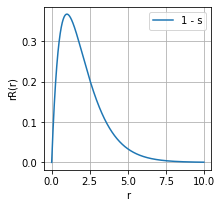

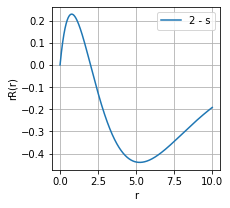

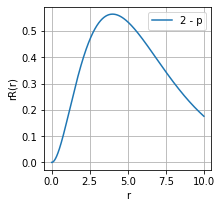

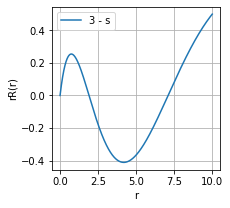

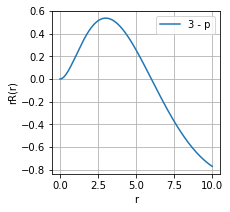

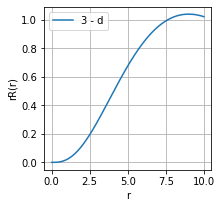

In [21]:
a = 1.0
shell = 3  # Principal quantum number
grid_points = 10000
r = np.linspace(0, 10, grid_points) # radial variable

for n in range(1,shell+1):
    for l in range(n):
        Rnl = radial_wavefunction(n,l,r)
        label = f"{n} - {l}"
        plot_it(r, Rnl, label)

### For l = 1 and s = 1/2, we will need the radial function with l =1,
    though the restriction for n >= 2 is more broad ranged, let's focus to n = 3

In [22]:
grid_points = 20000
r = np.linspace(0.1,10, grid_points)
psi_r = radial_wavefunction(n,l,r)

### <psi_r | (1/r^3) | psi_r>

In [23]:
def radial_integration(psi, r):
    integrand = np.conj(psi)*(r**(-3))*psi
    integral = simps(integrand, r)
    return integral

In [24]:
# In atomic units
# 4*pi*permitivity = 1
# speed of light = c = 137 
q_e = 1
m_e = 1
h_cut = 1
c = 137
const = (q_e**2)/(4*(m_e**2)*(c**2))

### fnl = const*radial_integration

In [25]:
radial_contri = const*radial_integration(psi_r, r)

### For one of the randomly picked LS coupled state for "J^2 - L^2 - S^2" operation:

In [26]:
random_num = np.random.randint(1,len(CG_dict))
random_vec = CG_dict[f"vec_{random_num}"]

In [27]:
ls_contri = ls_coupling(random_vec)

In [28]:
E_soc = radial_contri * ls_contri

In [29]:
E_soc

2.4243840650834822e-08